<a href="https://colab.research.google.com/github/lab30041954/ML_IESE_Course/blob/main/%5BML-06%5D%20Neural%20networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [ML-06] Neural networks

## What is a neural network?

**Neural networks** are as old as artificial intelligence itself, and the expectations about what neural networks could do have experimented up and downs along 60 years. Right now, they are very high. Neural networks and, more specifically, a special type of neural network models, the **transformer**, are taking over machine learning. As more use cases are reported for the new models, expectations about the power of artificial intelligence keep growing.  

A neural network can be thought as an interconnected set of computational **nodes** or neurons, organized in **layers**. In the network, every connection of a node to another node has a **weight**. Machine learning happens when these weights are learned from data. The way the nodes are connected in a neural network was initially inspired by ideas about how neurons work together in the brain. Though this is no longer true in most neural network models, in particular in transformers, the discussion about the similarities between the two domains is still alive.

There are many types of neural networks. This lecture is restricted to the **multilayer perceptron** (MLP) model, which has been the standard approach for many years. In the next lecture, we will introduce more complex architectures, which we call **deep learning** models.

Even if the idea of the neural network as a mathematical model for the brain (which it is not) was attractive, we regard nowadays a neural network as a mathematical function, which takes an input and returns an output. Both the input and the output are **tensors**. A tensor is the same as a NumPy array (though in Python they are different types of objects). So, a 0D tensor is a scalar (a number), a 1D tensor is a vector, a 2D tensor is a matrix, etc. Most of the operations performed with the tensors in a neural network are just linear algebra. We use the package **Keras** in the examples (more detail below).

## Basics of the MLP model

A multilayer perceptron network is formed by:

* The **input layer**, whose nodes are the features used for the prediction.

* The **output layer**. In regression models, it has a unique node, which is the target (as in the above figure), while, in classification models, it has one node for every target value.

* A sequence of **hidden layers**, placed between the input and the output layers. If the network is **fully-connected**, that is, if every node of a layer is connected to all the nodes of the following layer, the **network architecture** is completely specified by the number of hidden layers and the number of nodes in each hidden layer.

So the MLP model transforms a 1D tensor of features into either a 0D tensor (regression) or a 1D tensor of class probabilities. These tensors are the input and the output, respectively. How is the transformation performed? Suppose first that $Z$ is a hidden node and $U_1, U_2, \dots, U_k$ are the nodes of the preceding layer. Then, the values of $Z$ are calculated as

$$Z = F\big(w_0 + w_1U_1 + w_2U_2 + \cdots + w_kU_k\big).$$

In this context, the slope coefficients $w_1, w_2, \dots, w_k$  are called weights, and the intercept $w_0$ is called **bias**. $F()$ is the **activation function**.

The multilayer perceptron could be seen as if the inout data units were circulating through the network one-by-one. The feature values are entered in the input nodes, which send them to the nodes of the first hidden layer. At each hidden node, they are combined using the corresponding weights, and the result is transformed by means of the activation function. The hidden nodes send the resulting values to the nodes of the next layer, where they are combined. And so on, until arriving to the output layer.

## A graphical example

Let us help our intuition with the graphical representation of a small network. The model of the figure below is an MLP regressor with one hidden layer of two nodes. The diagram is just a graphical representation of a set of three equations, two for the hidden nodes and one for the output node. The equation of node $A$ combines $X_1$, $X_2$ and $X_3$ with weights $w_{1A}$, $w_{2A}$ and $w_{3A}$, while the equation in node $B$ combines them with weights $w_{1B}$, $w_{2B}$ and $w_{3B}$. The biases are $w_{0A}$ and $w_{0B}$, respectively.

![](https://raw.githubusercontent.com/lab30041954/Figures/main/nn.png)

At the hidden nodes, the **activation function** is applied to the values given by these equations. Once the activation has been applied, the outcomes of the two hidden nodes are combined in the third equation, with weights $w_{AY}$ and $w_{BY}$ and bias $w_{0Y}$, to obtain the predicted value of $Y$. This model has a total of 11 parameters.

## The activation function

The choice of the activation function is based on performance, since we do not have any serious theory that could explain why a specific mathematical formula works better than others. For the activation in the hidden nodes, the current trend favors the **rectified linear unit function** ($\hbox{ReLU}$). $\hbox{ReLU}(x)$ is equal to $x$ when $x>0$ and equal to $0$ otherwise. So, the default activation in the hidden layers consists in turning the negative incoming values into zeros.

In a MLP regressor (as in the figure), there is no activation at the (single) output node, so the equation predicting the values at that node is linear. In a MLP classifier, there are as many output nodes as target values. A **softmax activation** is applied to the whole set of incoming values, turning them into a set of **class probabilities**. In mathematical terms, this is the same as logistic regression applied to the output of the last hidden layer.

## Other technicalities

* *How to find the optimal weights*. Initially, the weights are randomly assigned. Then, an iterative process starts. At every step, the prediction is performed with the current weights, the value of a **loss function** is calculated, and the weights are adjusted in order to reduce the loss. The process is expected to converge to an optimal solution, but, in practice, a maximum number of passes is pre-specified. In regression, the loss is usually the MSE, while, in classification, it is the average cross-entropy (Keras uses natural logs to calculate it). The adjustment of the weights starts at the last layer, and continues backwards until the input layer. This is called **backpropagation**.

* *The optimization method*, called **solver** in scikit-learn and **optimizer** in the Keras API. The current trend favors the **stochastic gradient descent** (SGD) method, which has many variants. Though you may find in books or tutorials the variant `optimizer='rmsprop'`, we use here `optimizer='adam'`, which is faster.

* *The number of iterations*, that is, the number of times every data unit passes through the network, is controlled in Keras with the parameter **epochs**. The default is `epochs=1`. In SGD, the units don't pass all at once, but in **random batches** (see below).

* *The batch size*. In the SGD method, the training data are randomly partitioned in batches in every iteration. The batches are tried one-by-one and the weights are modified every time that a batch is tried. The Keras default is `batch_size=32`. We don't change this in the examples of this course.

* *The learning rate*, which we have already found in gradient boosting models, is a parameter which rules how fast the adjustment of the weights is done. If it is too low, there is no convergence to the optimal solution. If it is too high, you can overshoot the optimal solution. Modern ML software allows setting an initial learning rate and decrease it as the learning process goes on. The Keras default is `learning_rate=0.001`.

* *Normalization*. Optimization methods are sensitive to feature scaling, so it is highly recommended to scale your data. The example of this lecture illustrates this point in very clear way.

## TensorFlow, Torch and Keras

A number of attempts have been made to implement the mathematics of neural networks. Many of them are just history nowadays. The library **TensorFlow**, developed at Google Brain and released in 2015, has been for years the top popular choice, though the field seems to be divided right now between TensorFlow and **Torch** (PyTorch in Python).

**Keras** is a deep learning framework for Python (there is also a version for R), which provides a convenient way to define and train neural network models. The documentation is available at `https://keras.io`. Keras does not handle itself low-level operations such as tensor manipulation and differentiation. Instead, it relies on a specialized tensor library to do so. That library serves as the **backend** engine of Keras.

Keras was organized in a modular way, so several different backend engines could be plugged seamlessly into Keras. Keras 1 worked with three backend implementations, TensorFlow, Theano and CNTK. Given the dominance of TensorFlow, the last two options were dropped, so Keras 2 was no longer multi-backend, becoming just an API for TensorFlow. In November 2023, Keras 3 came again multi-backend, the optional backends being TensorFlow, Torch and JAX (a new Google development).

Just to give you an idea why Keras is popular, it has been said that the number of keystrokes needed to specify a deep learning model in Keras is one half of what was needed in old TensorFlow. Another advantage is that the code written in Keras by a developer using TensorFlow can be reused without change by another developer using Torch. Even if Torch tensors and TensorFlow tensors are different types of objects in Python, Keras takes care of that, and input and output tensors appear as NumPy arrays, which is the only thing you have to manage in Keras.

This course uses Keras with the default backend, which is TensorFlow. To use this notebook in your computer, you have to install Keras and TensorFlow. You can do that by entering in either the shell or a Jupyter app the command

```
pip install keras tensorflow
```

This is not needed in Google Colab, where everything is ready for the Keras/TensorFlow combo. When this is written, TensorFlow has not been updated for Python 3.13, which is the version coming with the current Anaconda distribution (there is no problem if you are still using Python 3.12 or older). You can skip this potential trouble running the notebook in Colab. The code used in the example will be explained there step-by-step.

*Note*. MLP models for regression and classification are available in scikit-learn, in the classes `MLPRegressor()` and `MLPClassifier()` of the subpackage `neural_networks`, but scikit-learn does not cover the advanced methodology needed in this part of the course.

## Example - The MNIST data

### Introduction

This example deals with the classification of grayscale images of handwritten digits (resolution 28 $\times$ 28), into 10 classes (0 to 9). The data are the famous **MNIST data**, a classic in the ML community, which have been around for almost as long as the field itself and have been very intensively studied.

The MNIST data set contains 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (NIST) in the 1980s. They have been extensively used for benchmarking. You can think of "solving" MNIST as the "Hello World" of deep learning. As you become an ML practitioner, the MNIST data come up over and over again, in scientific papers, blog posts, and so on.

## The data set

The data of the 70,000 images come together in the file `mnist.csv` (zipped). Every row stands for an image. The first column is a label identifying the digit (0-9). The other 784 columns correspond to the image pixels (28 $\times$ 28 = 784). The column name `ixj` must be read as the gray intensity of the pixel in row $i$ and column $j$ (in the images). These intensities are integers from 0 = Black to 255 = White (8-bit grayscale).

### Questions

Q1. Pick the first digit image (row 1). The 784 entries on the right of the label, from `1x1` to `28x28`, are the pixels' gray intensities. Pack these numbers as a vector and reshape that vector as a matrix of 28 rows and 28 columns. Plot the corresponding image with the `matplotlib.pyplot` function `imshow()`. This function will be using default colors which do not help here, so you can turn everything to gray scale by executing the function `gray()`. Your plot will have then black background, with the number drawn in white. Guess how to reverse this, so the image looks like white paper with a number drawn in black ink.

Q2. Repeat the exercise with other images. You don't need the function `gray()` anymore.

Q3. Split the data in a training set with 60,000 data units and a test set with 10,000 units.

Q4. Train and test a **decision tree classifier** and a **random forest classifier** on these data, controlling the growth of the trees with the argument `max_leaf_nodes=128`.

Q5. Train and test a MLP model, with a hidden layer of 32 nodes, using that split.

Q6. How does the MLP model make predictions?

Q7. Convert the gray scale to the 0-1 range (0 = Black, 1 = White), and try again with the same MLP architecture.

### Importing the data

As in the preceding examples, we use the Pandas function `read_csv()` to import the data from a GitHub repository. Since the images do not have an identifier, we leave Pandas to create a `RangeIndex`. The source file is zipped, but `read_csv()` can manage this without a specific argument, based on the file extension `.zip`.

In [1]:
import numpy as np, pandas as pd
path = 'https://raw.githubusercontent.com/lab30041954/Data/main/'
df = pd.read_csv(path + 'mnist.csv.zip')

We check the shape of the data frame:

In [2]:
df.shape

(70000, 785)

### Target vector and features matrix

We set the first column (the image labels) as the target vector and the pixel intensities as the feature matrix. We use only NumPy arrays in this example, to simplify the syntax. So, we convert the Pandas objects to arrays by means of `.values`

In [3]:
y = df['label'].values
X = df.drop(columns='label').values

We can examine the labels the NumPy function `unique()`. This shows that the data are a bit unbalanced: ones are most frequent, and fives least frequent.

In [4]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]))

The pixel values can also be checked with `unique()`. We don't calculate here the counts for the 256 values, to keep it short.

In [5]:
np.unique(X)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### Q1. Plotting the first image

Every row corresponds to the image of a digit. Let us visualize this by plotting the images with Matplotlib. In the first row, the 784 entries, from 1 $\times$ 1 to 28 $\times$ 28, are the pixels' gray intensities. To plot the image, we have to reshape it as a 2D array with 28 rows and 28 columns. This can be done with the method `.reshape()`.

In [6]:
pic = X[0, :].reshape(28,28)

The `matplotlib.pyplot` function `imshow()` converts this array to a picture and displays it:

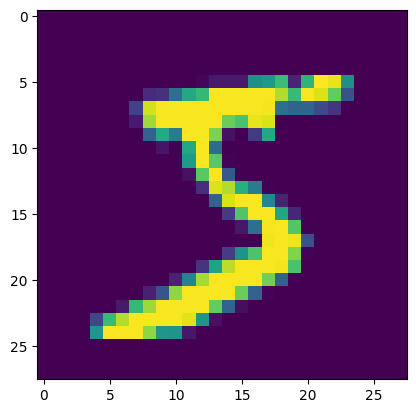

In [7]:
from matplotlib import pyplot as plt
plt.imshow(pic);

These are the default colors displayed by `imshow()`. To turn them into gray scale, one can use the argument `cmap='gray'`.

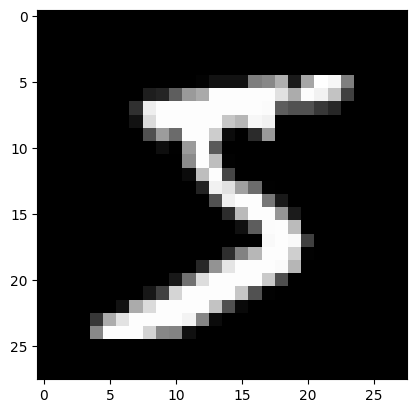

In [8]:
plt.imshow(pic, cmap='gray');

The gray scale can be set as the default with the function `gray()`. Now, reversing the scale, we can show the picture as it were a digit written with black pencil on a white paper surface:

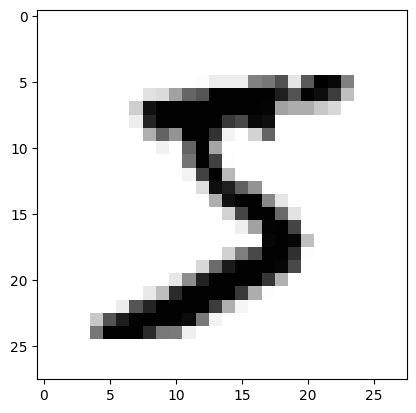

In [9]:
plt.gray()
plt.imshow(255 - pic);

This five is far from caligraphic, but still recognizable by a human eye.

### Q2. Plotting other images

The second image of the data set is a zero:

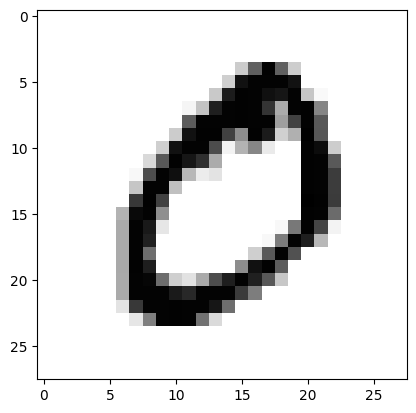

In [10]:
pic = X[1, :].reshape(28,28)
plt.imshow(255 - pic);

And the third one a four:

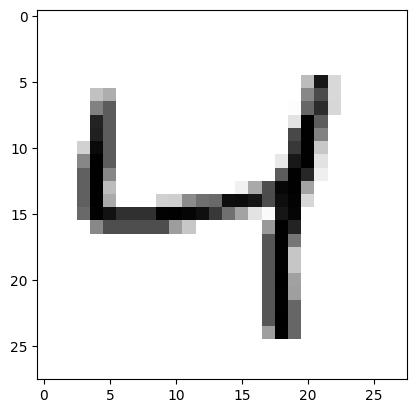

In [11]:
pic = X[2, :].reshape(28,28)
plt.imshow(255 - pic);

### Q3. Train-test split

We split the data set, so we can validate the models that we will try. We keep 10,000 pictures for testing, which is common practice with the MNIST data. We set `random_state=0` for reproducibility. So, we will be able to rescale the features and apply the same split to the rescaled data.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

### Q4. Tree-based models

We start with a decision tree classifier, to get a first benchmark. We use an estimator from the class `DecisionTreeClassifier()`, of the scikit-learn subpackage `tree`. Given the size of the data set, we set `max_leaf_nodes=128`, to control the growth of the tree. We calculate the accuracy on both training and test data. The accuracy can be a good way to evaluate this model, since the data set is quite balanced and we don't have any preference for a particular digit.

In [13]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_leaf_nodes=128)
treeclf.fit(X_train, y_train)
round(treeclf.score(X_train, y_train), 3), round(treeclf.score(X_test, y_test), 3)

(0.809, 0.791)

Even if the tree is big, we don't find evidence of overfitting. The accuracy is not negligeable, but would not be enough for business applications. For instance, to be used on scanned zipcodes (five digits). Maintaining the specification for the tree size, we try now a random forest classifier with 100 trees.

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(max_leaf_nodes=128, n_estimators=100)
rfclf.fit(X_train, y_train)
round(rfclf.score(X_train, y_train), 3), round(rfclf.score(X_test, y_test), 3)

(0.927, 0.917)

This is clearly better than an individual tree, and overfitting is moderate. The homework suggests that you can improve this a bit more by changing the specs. You can also try a gradient boosting model.

### Q5. MLP model

We try now a simple neural network, using the Keras, with the TensorFlow backend. Assuming that Keras and TensorFlow are already installed and everything is all right (it will be if run this notebook in Google Colab), we import the function `Input()` and the modules `models` and `layers`, which contain the resources needed for this example.

In [15]:
from keras import Input, models, layers

The module `models` has two classes, `.Sequential()` and `.Model()`. The first one can only specify a network architecture made of a sequence of layers. The other class, known as the **Functional API**, does not have that restriction. We use `.Model()` in this course.

A simple way to specify the network architecture is to create a list of layers. The layers are extracted from classes of the module `layers`. For a MLP network we only need the class `Dense()`. For instance, a MLP network with one hidden layer of 32 nodes for the MNIST data would be specified as follows. First, the **input layer** contains one node for every feature (there 784 features, one for each pixel).

In [16]:
input_tensor = Input(shape=(784,))

Next, the **hidden layer**, that transforms the input tensor (length 784) into a new tensor (length (32). It is a dense layer, meaning that every node is connected to all nodes of the preceding layer. The activation function is the **rectified linear unit function** (ReLU).

In [17]:
x = layers.Dense(32, activation='relu')(input_tensor)

Finally, the **output layer** transforms the hidden tensor (length 32) into a tensor of class probabilities (length 10). The activation function is here the **softmax**, which ensures that the output is a vector of probabilities (positive numbers summing 1).

In [18]:
output_tensor = layers.Dense(10, activation='softmax')(x)

The next step is instantiate an object of the class `models.Model()`. This works as in scikit-learn. We specify here the input and the output.

In [19]:
mlpclf1 = models.Model(input_tensor, output_tensor)

The method `.summary()` prints a summary of the network architecture, reporting the number of parameters in every layer. In the hidden layer, every node receives 784 inputs (one for each pixel), which are combined wby means of a linear expression involving the same number of **weights** (the slope coefficients) plus a **bias** (the intercept). So, 785 parameters are needed at every node, which makes a total of 32 $\times$ 785 = 25,120 parameters. In a similar way, in the output layer, every node needs 33 parameters, which adds 10 $\times$ 33 = 330 parameters to get a total of 25,450 parameters for the whole network.

In [20]:
mlpclf1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

Now, we **compile** the model, meaning the mathematical apparatus needed for the learning process gets ready. We have to specify the **optimization algorithm** (`optimizer='adam'`), the **loss function** (`loss='sparse_categorical_crossentropy'`) and the metrics used to evaluate the model performance (`metrics=['acc']`), in a list or dictionary.

In [21]:
mlpclf1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

We are ready now to apply the method `.fit()`. Note that the number of iterations is specified here, not when creating the model, as it was in scikit-learn. In every iteration, or **epoch**, the data set is randomly split in batches of size 32 (if you accept the deafult size). These batches are passed sequentially, and the parameter values are updated for every batch. This means that they not are updated 50 times, but 50 times the number of batches (1,875). By default, a report of the progress is gradually displayed on the screen. In this example, every epoch takes about nine seconds in a regular laptop.

In [22]:
mlpclf1.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test));

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - acc: 0.5683 - loss: 6.6453 - val_acc: 0.7672 - val_loss: 0.7716
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - acc: 0.8135 - loss: 0.6595 - val_acc: 0.8769 - val_loss: 0.5359
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.8758 - loss: 0.4858 - val_acc: 0.8922 - val_loss: 0.4266
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9039 - loss: 0.3787 - val_acc: 0.9053 - val_loss: 0.3687
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9160 - loss: 0.3328 - val_acc: 0.9014 - val_loss: 0.3693
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9238 - loss: 0.2980 - val_acc: 0.9247 - val_loss: 0.3278
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - acc: 0.9307 - loss: 0.2751 - val_acc: 0.9240 - val_loss: 0.3096
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9319 - loss: 0.2656 - val_acc: 0.9275 - val_loss: 0.3370
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━

This is our best result so far, though we can do better with a gradient boosting model, as suggested in the homework, or by rescaling the data, as suggested in question Q7.

### Q6. Prediction with a MLP model

In a classification setting, the Keras method `.predict()` returns the class probabilities (not the predicted class), just as the scikit-learn method `.predict_proba()`. In this example, it returns, for a given input, the 10 values given by the softmax activation at the output nodes, which are the **predicted class probabilities** for that input. For instance, for the first digit of the test set, we get:

In [23]:
mlpclf1.predict(X_test[:1, :])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[9.8997855e-01, 2.4395902e-06, 1.8417242e-04, 2.6305972e-07,
        1.7291821e-05, 1.9600892e-03, 2.8388551e-05, 7.7114701e-06,
        6.2834258e-09, 7.8210300e-03]], dtype=float32)

According to the model, with probability 99.0%, this is a zero. Indeed, the prediction is correct:

In [24]:
y_test[0]

np.int64(0)

### Q7. Rescaling the data

As a general rule, it is recommended to rescale the features to the 0-1 range. This speeds up the convergence and may improve the predictions. In this example, we can rescale the pixel intensities by dividing by 255.

In [25]:
X = X/255

We have now a new features matrix, that we split exactly in the same way as we did with before (the argument `random_state=0` does the trick).

In [26]:
X_train, X_test = train_test_split(X, test_size=1/7, random_state=0)

Now, we instantiate a new model, which we train on the rescaled data. We keep `epochs=20`, even if we guess that so many epochs are not needed. The training process is not only faster, achieving accuracy 93.3% in the first epoch, but it also yields better results at the end.

In [27]:
mlpclf2 = models.Model(input_tensor, output_tensor)
mlpclf2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
mlpclf2.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test));

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.7422 - loss: 0.9395 - val_acc: 0.9330 - val_loss: 0.2299
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9416 - loss: 0.2038 - val_acc: 0.9457 - val_loss: 0.1827
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9543 - loss: 0.1588 - val_acc: 0.9496 - val_loss: 0.1672
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9598 - loss: 0.1381 - val_acc: 0.9528 - val_loss: 0.1512
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9638 - loss: 0.1225 - val_acc: 0.9549 - val_loss: 0.1433
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9667 - loss: 0.1130 - val_acc: 0.9560 - val_loss: 0.1387
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.9699 - loss: 0.1027 - val_acc: 0.9553 - val_loss: 0.1377
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9700 - loss: 0.0988 - val_acc: 0.9572 - val_loss: 0.1369
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━

### Homework

1. At every node of every tree, the **random forest** algorithm searches for the best split using a **random subset of features**. The number of features is controlled by the parameter `max_features`. We have used the default, which is the square root of the number of columns of the feature matrix (`max_features=sqrt`). This means, in this case, 28 features. Logic tells us that, by increasing `max_features`, we will improve the accuracy, but the learning process (the fit step) will get slower. Try some variations on this, to see how it works in practice. Do you think that using the default number of features here was a good choice?

2. Develop a **gradient boosting classifier** for these data, extracted from the `xgboost` class `XGBClassifier()`. Take into account that, with hundreds of columns, a gradient boosting model may be much slower to train than a random forest model with the same tree size and number of trees. A model with 100 trees and a size similar to those shown in this example can take one hour to train (less with XGBoost), though you may find a speed-up by increasing the **learning rate**.

3. Develop a **logistic regression classifier** for these data. Compare it with the other models that have appeared in this example.

4. Calculate a **confusion matrix** for the logistic regression model (dimension 10x10). Which is the best classified digit? Which is the main source of misclassification?
